Import library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

Read Dataset


In [ ]:
df_dp= pd.read_csv("/content/cleaned_blinkit_delivery_performance.csv")

Display Dataset

In [ ]:
df_dp

order_id  delivery_partner_id promised_time actual_time  \
0     1961864118                63230      08:52:01    08:47:01   
1     1549769649                14983      13:25:29    13:27:29   
2     9185164487                39859      13:25:12    13:29:12   
3     9644738826                61497      16:34:56    16:33:56   
4     5427684290                84315      05:17:39    05:18:39   
...          ...                  ...           ...         ...   
4565  1669690997                90914      16:05:20    16:10:20   
4566  8340761903                27952      09:38:43    09:36:43   
4567  5936301790                 9590      19:23:09    19:26:09   
4568  5710579377                29940      15:12:13    15:10:13   
4569  2494813730                32851      12:20:18    12:21:18   

      delivery_time_minutes  distance_km delivery_status reasons_if_delayed  \
0                       5.0         0.96         On Time           No Delay   
1                       2.0         0.98         On Time            Traffic   
2                       4.0         3.83         On Time            Traffic   
3                       1.0         2.76         On Time           No Delay   
4                       1.0         2.63         On Time            Traffic   
...                     ...          ...             ...                ...   
4565                    5.0         1.86         On Time            Traffic   
4566                    2.0         3.31         On Time           No Delay   
4567                    3.0         2.44         On Time            Traffic   
4568                    2.0         1.76         On Time           No Delay   
4569                    1.0         2.70         On Time            Traffic   

     promised_date actual_date  
0       2024-07-17  2024-07-17  
1       2024-05-28  2024-05-28  
2       2024-09-23  2024-09-23  
3       2023-11-24  2023-11-24  
4       2023-11-20  2023-11-20  
...            ...         ...  
4565    2023-12-25  2023-12-25  
4566    2023-11-27  2023-11-27  
4567    2024-06-21  2024-06-21  
4568    2024-06-06  2024-06-06  
4569    2023-08-23  2023-08-23  

[4570 rows x 10 columns]

Display summary information


In [ ]:
df_dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4570 entries, 0 to 4569
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               4570 non-null   int64  
 1   delivery_partner_id    4570 non-null   int64  
 2   promised_time          4570 non-null   object 
 3   actual_time            4570 non-null   object 
 4   delivery_time_minutes  4570 non-null   float64
 5   distance_km            4570 non-null   float64
 6   delivery_status        4570 non-null   object 
 7   reasons_if_delayed     4570 non-null   object 
 8   promised_date          4570 non-null   object 
 9   actual_date            4570 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 357.2+ KB


Count and display missing values in each column


In [ ]:
print(df_dp.isnull().sum())


order_id                 0
delivery_partner_id      0
promised_time            0
actual_time              0
delivery_time_minutes    0
distance_km              0
delivery_status          0
reasons_if_delayed       0
promised_date            0
actual_date              0
dtype: int64


Total number of deliveries




In [ ]:
total_deliveries = len(df_dp)
total_deliveries


4570

Count the number of on-time deliveries


In [ ]:
on_time_deliveries = df_dp[df_dp["delivery_status"] == "On Time"].shape[0]
on_time_deliveries


3470

Count the number of slightly delayed deliveries


In [ ]:
Slightly_Delayed= df_dp[df_dp["delivery_status"] == "Slightly Delayed"].shape[0]
Slightly_Delayed


1037

Count the number of significantly delayed deliveries


In [ ]:
Significantly_Delayed = df_dp[df_dp["delivery_status"] == "Significantly Delayed"].shape[0]
Significantly_Delayed


63

Visualize delivery status distribution


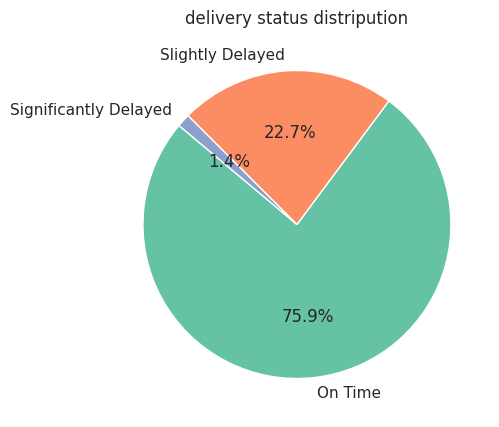

In [ ]:
status_counts = df_dp['delivery_status'].value_counts()
plt.figure()
status_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("delivery status distripution")
plt.ylabel('')
plt.show()

Calculate the percentage of on-time deliveries


In [ ]:
success_rate = (on_time_deliveries / total_deliveries) * 100
success_rate

75.92997811816193

Calculate the average delivery time in minutes


In [ ]:
average_delivery_time = df_dp['delivery_time_minutes'].mean()
average_delivery_time

plt.figure()
sns.boxplot(x=df_dp['delivery_time_minutes'], color='skyblue')
plt.title(" Distribution of delivery times")
plt.xlabel('Delivery time)')
plt.show()

np.float64(4.67746170678337)

Delivery time

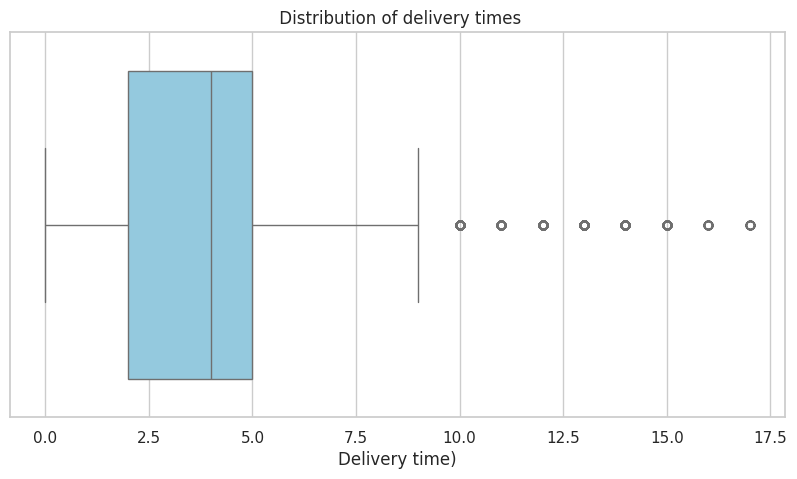

In [ ]:
##plt.figure()
sns.boxplot(x=df_dp['delivery_time_minutes'], color='skyblue')
plt.title(" Distribution of delivery times")
plt.xlabel('Delivery time)')
plt.show()

Count occurrences of delay reasons

In [ ]:
delay_reasons = df_dp['reasons_if_delayed'].value_counts()
delay_reasons

reasons_if_delayed
Traffic     2668
No Delay    1902
Name: count, dtype: int64

155

 The main reasons for delivery delays using a bar chart

<ipython-input-17-e7a1c48ab411>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_reasons.values, y=delay_reasons.index, palette='Set3')


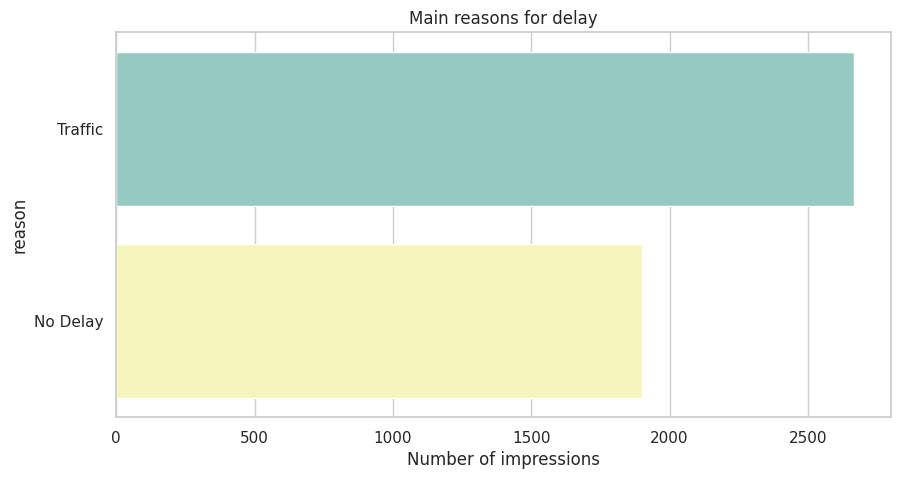

In [ ]:
delay_reasons = df_dp['reasons_if_delayed'].value_counts()
plt.figure()
sns.barplot(x=delay_reasons.values, y=delay_reasons.index, palette='Set3')
plt.title('Main Reasons for Delay')
plt.xlabel("Number of Occurrences")
plt.ylabel("Reason")
plt.show()

Generate summary statistics for delivery time


In [ ]:
delivery_times_distribution = df_dp['delivery_time_minutes'].describe()
delivery_times_distribution

count    4570.000000
mean        4.677462
std         4.045825
min         0.000000
25%         2.000000
50%         4.000000
75%         5.000000
max        17.000000
Name: delivery_time_minutes, dtype: float64

Plot the distribution of delivery times using a histogram

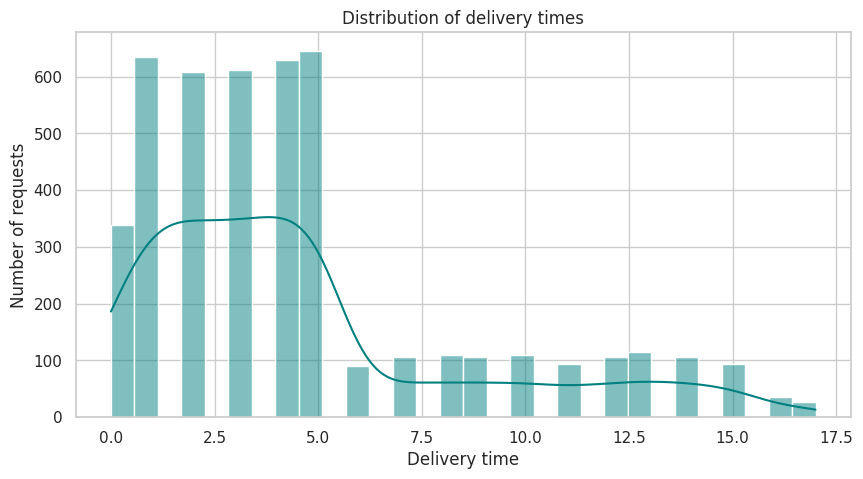

In [ ]:
plt.figure()
sns.histplot(df_dp['delivery_time_minutes'], bins=30, kde=True, color='teal')
plt.title("Distribution of delivery times")
plt.xlabel('Delivery time')
plt.ylabel("Number of requests")
plt.show()

Compute correlation between distance and delivery time


In [ ]:
correlation_distance_delivery_time = df_dp[['distance_km', 'delivery_time_minutes']].corr()
correlation_distance_delivery_time

distance_km  delivery_time_minutes
distance_km               1.000000               0.005532
delivery_time_minutes     0.005532               1.000000

Plot the LOWESS regression trend for distance vs delivery time


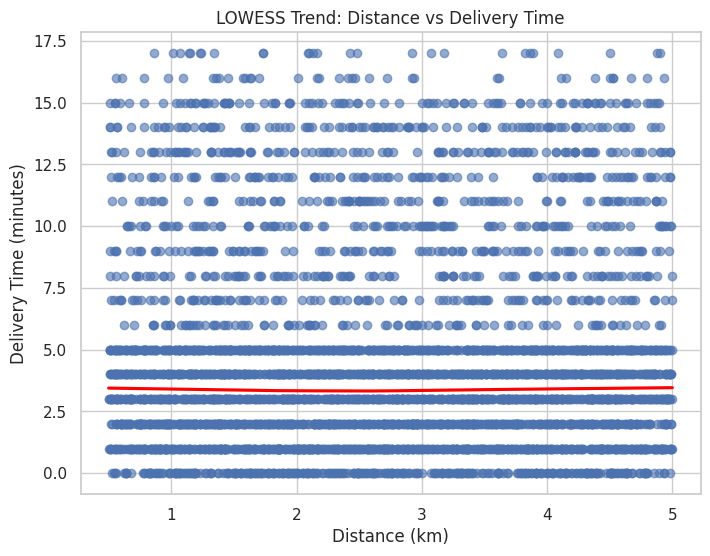

In [ ]:
# Exploring the Link Between Distance and Delivery Time (Linear or Non-Linear)

plt.figure(figsize=(8, 6))
sns.regplot(data=df_dp, x='distance_km', y='delivery_time_minutes',
            scatter_kws={'alpha': 0.6}, lowess=True, line_kws={'color': 'red'})
plt.title("LOWESS Trend: Distance vs Delivery Time")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (minutes)")
plt.show()


Calculate Pearson correlation between distance and delivery time


In [ ]:
corr = df_dp['distance_km'].corr(df_dp['delivery_time_minutes'])
print(f"Pearson correlation: {corr:.2f}")
#The correlation between distance and delivery time is very weak (0.01), indicating no significant linear relationship.

Pearson correlation: 0.01
